<a href="https://colab.research.google.com/github/TenzingJoseph/CTS-Python/blob/main/Heart_Diseases_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing required Libraries

In [59]:
import numpy as np                # Multi-Dimensional array object
import pandas as pd               # Data Manipulation
import matplotlib.pyplot as plt   # Data Visualization
import seaborn as sns             # Data Visualization 
import plotly.graph_objects as go # Interactive Data Visualization

from sklearn.preprocessing import StandardScaler      # Scaling 
from sklearn.model_selection import train_test_split  # Train, test & split
from sklearn.linear_model import LogisticRegression   # Logistic regression
from sklearn import metrics                           # Metrics

## Loading required Dataset

In [2]:
df = pd.read_csv('framingham.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


## Data Understanding

In [6]:
df.shape

(4238, 16)

In [8]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [11]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [12]:
df.dropna(axis=0, inplace=True)

In [13]:
df.shape

(3656, 16)

In [14]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [15]:
df.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             241
sysBP               231
diaBP               142
BMI                1297
heartRate            72
glucose             138
TenYearCHD            2
dtype: int64

In [16]:
df["TenYearCHD"].value_counts()

0    3099
1     557
Name: TenYearCHD, dtype: int64

In [19]:
print('The percentage of patients having the risk of CHD in next ten years is {}%'.format(round((df['TenYearCHD'].sum())*100/df.shape[0]),2))

The percentage of patients having the risk of CHD in next ten years is 15%


In [21]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [47]:
continuous = df[['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]
continuous.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0


In [39]:
category = df.drop(['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose'], axis=1)
category = category.astype(int)
category.head()

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,1,4,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0
3,0,3,1,0,0,1,0,1
4,0,3,1,0,0,0,0,0


## Visualizations

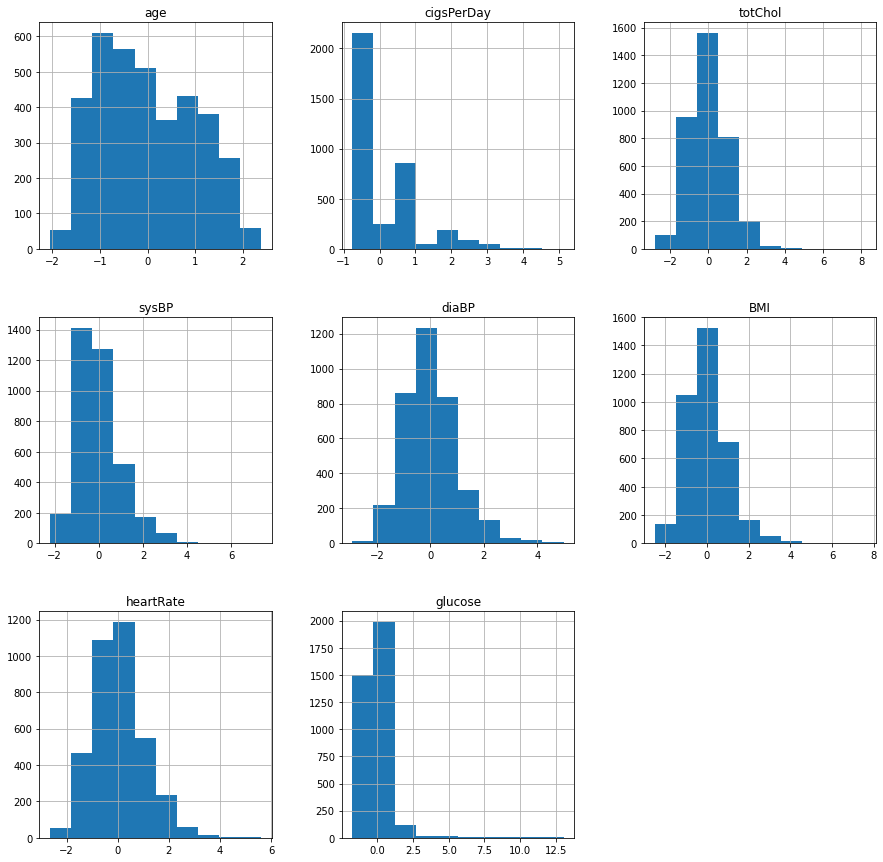

In [74]:
continuous.hist(figsize = (15, 15));

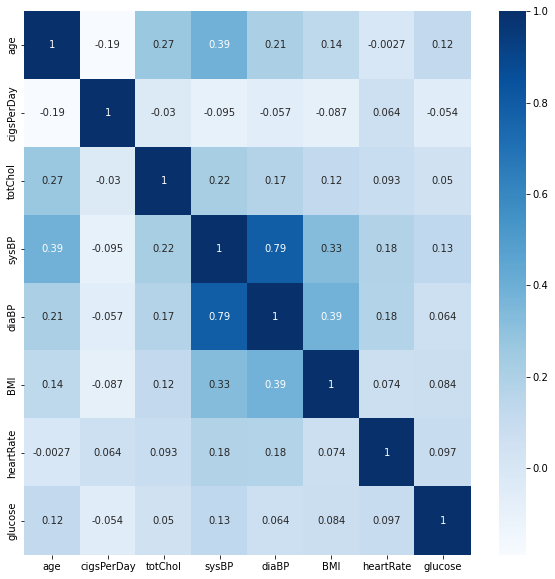

In [38]:
corr = continuous.corr()

plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot=True, cmap='Blues');

## Data Preparation

In [50]:
scaler = StandardScaler()

cont = list(continuous.columns)
continuous[cont] = scaler.fit_transform(continuous[cont])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
continuous.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,-1.233351,-0.757068,-0.949714,-1.193695,-1.078415,0.291688,0.356340,-0.203127
1,-0.415591,-0.757068,0.297729,-0.514637,-0.159695,0.724614,1.608289,-0.244956
2,-0.181945,0.921174,0.184325,-0.220378,-0.243215,-0.109261,-0.060977,-0.495930
3,1.336754,1.760294,-0.269291,0.798209,1.009584,0.687717,-0.895610,0.884427
4,-0.415591,1.172910,1.091556,-0.107202,0.090864,-0.660258,0.773656,0.131505


In [52]:
df1 = pd.concat([continuous, category], axis=1)

In [54]:
df1.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,-1.233351,-0.757068,-0.949714,-1.193695,-1.078415,0.291688,0.356340,-0.203127,1,4,0,0,0,0,0,0
1,-0.415591,-0.757068,0.297729,-0.514637,-0.159695,0.724614,1.608289,-0.244956,0,2,0,0,0,0,0,0
2,-0.181945,0.921174,0.184325,-0.220378,-0.243215,-0.109261,-0.060977,-0.495930,1,1,1,0,0,0,0,0
3,1.336754,1.760294,-0.269291,0.798209,1.009584,0.687717,-0.895610,0.884427,0,3,1,0,0,1,0,1
4,-0.415591,1.172910,1.091556,-0.107202,0.090864,-0.660258,0.773656,0.131505,0,3,1,0,0,0,0,0


In [55]:
X = df1.drop(["TenYearCHD"], axis = 1)
y = df1["TenYearCHD"]

## Train Test & Split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 150, stratify = y)

## Train and evaluate a Logistic Regression model

In [60]:
LR = LogisticRegression(max_iter=10000)     
LR.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [64]:
# Scoring

y_predict = LR.predict(X_test)

## Model Evaluation

In [65]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       930
           1       0.60      0.07      0.13       167

    accuracy                           0.85      1097
   macro avg       0.73      0.53      0.52      1097
weighted avg       0.82      0.85      0.80      1097



In [66]:
cnf_matrix = metrics.confusion_matrix(y_test, y_predict1)
cnf_matrix

array([[922,   8],
       [155,  12]])

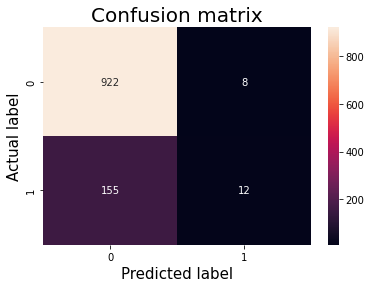

In [67]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='g')
plt.title('Confusion matrix', y=1, fontsize = 20)
plt.ylabel('Actual label', fontsize = 15)
plt.xlabel('Predicted label', fontsize = 15)
plt.show()

In [71]:
# Model Evaluation

print("Accuracy  :",round(metrics.accuracy_score(y_test, y_predict),2))
print("Precision :",round(metrics.precision_score(y_test, y_predict),2))
print("Recall    :",round(metrics.recall_score(y_test, y_predict),2))

Accuracy  : 0.85
Precision : 0.6
Recall    : 0.07
